In [165]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
import matplotlib.pyplot as plt
from pylab import savefig
%matplotlib inline

<IPython.core.display.Javascript object>


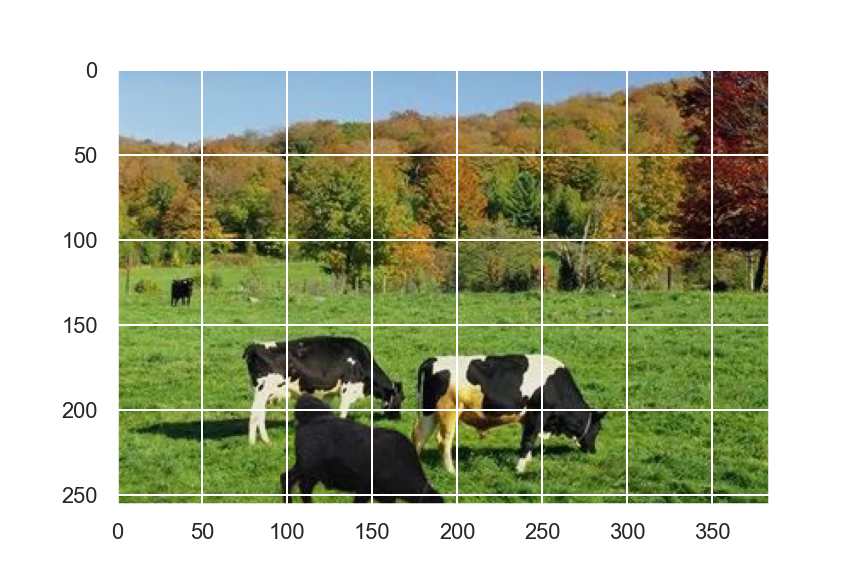

In [129]:
img = plt.imread("./3.jpg")
img = img.astype('float32') / 255.
plt.imshow(img)

In [90]:
filter1 = [[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 1, -3, 3, -1],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]]
filter1 = np.array(filter1)/3

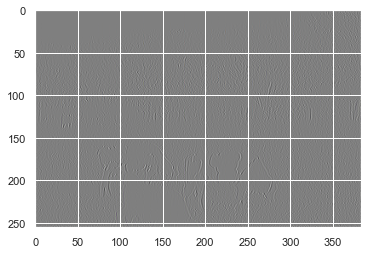

In [91]:
import cv2
filtered = dst = cv2.filter2D(img, -1, filter1)
filtered = filtered/2 +0.5
plt.imshow(filtered)

In [92]:
block = filtered[0:32, 0:32]
block.shape

(32, 32, 3)

In [93]:
q = [4.0, 12.0, 2.0]
filter1 = [[0, 0, 0, 0, 0],
           [0, -1, 2, -1, 0],
           [0, 2, -4, 2, 0],
           [0, -1, 2, -1, 0],
           [0, 0, 0, 0, 0]]
filter2 = [[-1, 2, -2, 2, -1],
           [2, -6, 8, -6, 2],
           [-2, 8, -12, 8, -2],
           [2, -6, 8, -6, 2],
           [-1, 2, -2, 2, -1]]
filter3 = [[0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0],
           [0, 1, -2, 1, 0],
           [0, 0, 0, 0, 0],
           [0, 0, 0, 0, 0]]
filter1 = np.asarray(filter1, dtype=float) / q[0]
filter2 = np.asarray(filter2, dtype=float) / q[1]
filter3 = np.asarray(filter3, dtype=float) / q[2]

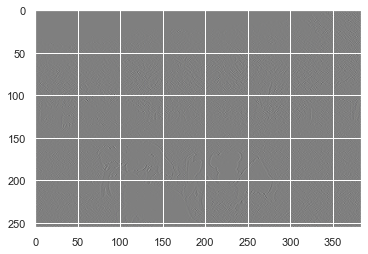

In [95]:
filtered1 = dst = cv2.filter2D(img, -1, filter1)
filtered1 = filtered1/2 +0.5
filtered2 = dst = cv2.filter2D(img, -1, filter2)
filtered2 = filtered2/2 +0.5
filtered3 = dst = cv2.filter2D(img, -1, filter3)
filtered3 = filtered3/2 +0.5
filtered = (filtered1 + filtered2 + filtered3)/3
plt.imshow(filtered)

In [166]:
def _build_SRM_kernel():
    q = [4.0, 12.0, 2.0]
    filter1 = [[0, 0, 0, 0, 0],
               [0, -1, 2, -1, 0],
               [0, 2, -4, 2, 0],
               [0, -1, 2, -1, 0],
               [0, 0, 0, 0, 0]]
    filter2 = [[-1, 2, -2, 2, -1],
               [2, -6, 8, -6, 2],
               [-2, 8, -12, 8, -2],
               [2, -6, 8, -6, 2],
               [-1, 2, -2, 2, -1]]
    filter3 = [[0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0],
               [0, 1, -2, 1, 0],
               [0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0]]
    filter1 = np.asarray(filter1, dtype=float) / q[0]
    filter2 = np.asarray(filter2, dtype=float) / q[1]
    filter3 = np.asarray(filter3, dtype=float) / q[2]
    filters = [[filter1, filter1, filter1], [filter2, filter2, filter2], [filter3, filter3, filter3]]
    filters = np.einsum('klij->ijlk', filters)
    filters = filters.flatten()
    initializer_srm = tf.constant_initializer(filters)

    return initializer_srm

In [167]:
from tensorflow.python.keras import Model
from tensorflow.python.keras.layers import Conv2D
import tensorflow as tf

In [170]:
model = tf.keras.Sequential()
model.add(Conv2D(3, [5, 5], trainable=False, kernel_initializer=_build_SRM_kernel(), 
                 activation='relu', padding='same', strides=1, 
                 bias_initializer=tf.constant_initializer(0.5)))

noise = model.predict(np.array([img]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


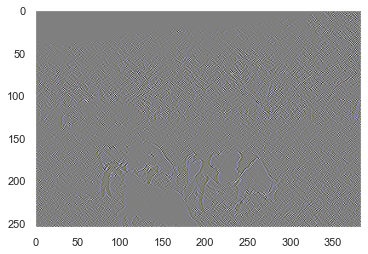

In [171]:
noise_plot = noise[0,...] 
fig, ax = plt.subplots(ncols=1, nrows=1)
plt.imshow(noise_plot)
ax.grid(False)

In [121]:
noise.shape

(384, 3)